# The sound of series

num_numbers = 50
duration_ms = 100
audio file: sound_files/arithmetic_sound.wav
audio file: sound_files/triangular_sound.wav
audio file: sound_files/square_sound.wav
audio file: sound_files/prime_sound.wav


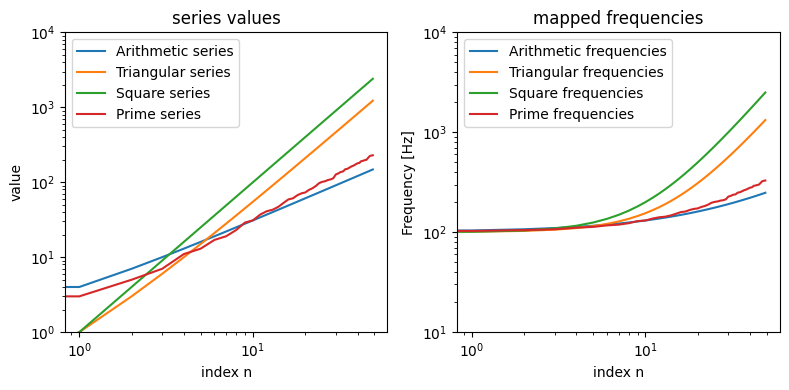

In [1]:
from pydub import AudioSegment
from pydub.generators import Sine
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange

"""
    maps a sequence of numbers to a range of frequencies and produces audio files (.wav)

    each number in the input sequence is converted to a frequency
    using modulo operation and an offset. The resulting frequencies
    are within the range from 100 Hz to (max_frequency + 99) Hz,
    3000+99 Hz in this case.

    returns:
        list of int: A list of frequencies corresponding to the input sequencem and fun 
        .wav files to listen to! 

    requirements:
    - pydub library. You can install this by doing pip install pydub
    - Numpy, matplotlib
 """


# fibonacci sequence
def fibonacci(n):
    fib_sequence = [0, 1]
    while len(fib_sequence) < n:
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    return fib_sequence

#  arithmetic sequence
def arithmetic_sequence(n, a=1, d=1):
    return [a + i * d for i in range(n)]

# triangular numbers
def triangular_numbers(n):
    return [(i * (i + 1)) // 2 for i in range(n)]

# square numbers
def square_numbers(n):
    return [i ** 2 for i in range(n)]

# prime numbers
def prime_numbers(n):
    return list(primerange(1, 10**6))[:n]

# a sine wave sound for a given frequency and duration
def create_sound(frequency, duration):
    return Sine(frequency).to_audio_segment(duration=duration)

# params
num_numbers = 50      # this is fine for now, too high gives trouble in mapping
duration_ms = 100     # duration of each note in milliseconds, adjust
max_frequency = 3000  # upper bound for frequency mapping, this matter for mapping, see below

print(f"num_numbers = {num_numbers}")
print(f"duration_ms = {duration_ms}")

# define the series
series_functions = {
    #'Fibonacci': fibonacci,
    'Arithmetic': lambda n: arithmetic_sequence(n, a=1, d=3),
    'Triangular': triangular_numbers,
    'Square': square_numbers,
    'Prime': prime_numbers
}

# plots
plt.figure(figsize=(8, 4))

for idx, (name, func) in enumerate(series_functions.items()):
    sequence = func(num_numbers)
    
    # map numbers to freqs
    frequencies = []
    for num in sequence:
        frequency = (num % max_frequency) + 100 # some offset
        frequencies.append(frequency)

    # create audio segment
    audio = AudioSegment.silent(duration=0)
    for freq in frequencies:
        audio += create_sound(freq, duration_ms)
    
    # export
    output_file = f"sound_files/{name.lower()}_sound.wav"
    audio.export(output_file, format="wav")
    print(f"audio file: {output_file}")
    
    # plot my seriess
    plt.subplot(1, 2, 1)
    plt.loglog(sequence, label=f'{name} series')
    plt.xlabel('index n')
    plt.ylabel('value')
    plt.ylim(1e0,1e4)
    plt.title('series values')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.loglog(frequencies, label=f'{name} frequencies')
    plt.xlabel('index n')
    plt.ylabel('Frequency [Hz]')
    plt.ylim(1e1,1e4)
    plt.title('mapped frequencies')
    plt.legend()

plt.savefig('the_sound_of_series.png', dpi=300)
plt.tight_layout()
plt.show()